### **Homework #4 — Exploratory Data Analysis (EDA)**

**Project:** Analysis of trends in conspiracy theories during 2020 and the influence of the COVID-19 pandemiс

**Authors:** Hovoryshcheva Veronika, Morozova Polina

**Team ID:** 15

**Dataset:** normalized_data.csv

**Time spent:** blabla

In [4]:
# start_time = "13:53, 31.10.2025"

#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

### **Goal**

The goal of this exploratory data analysis is to understand Reddit discussions about conspiracy theories in 2020, focusing on dataset structure, user activity, and subreddit interactions. It also aims to examine sentiment and emotional tone, identify recurring narratives and key phrases, and explore topic-specific patterns, such as COVID-related discussions and skepticism toward mainstream information. The analysis seeks to reveal dominant narratives, engagement patterns, and language trends across communities.

### **List of the Research Questions**
#### Overview

1. How many total records does the dataset contain, and how are they divided between submissions and comments?
2. What is the timeframe covered by the dataset?
3. What basic information can be summarized about the dataset (columns, data types, missing values)?
4. Which specific conspiracy theories were most frequently discussed in 2020?

#### Activity and Distribution

5. Which are the top 10 most active subreddits by number of posts/comments?
6. Are there significant peaks of activity around major real-world events?
7. How many unique authors are there, and how many contributions did each make?
8. Which subreddits have the highest average score versus the highest post volume?
9. Do different subreddits experience synchronized activity peaks?
10. Do the most active authors post in many subreddits or focus on one community?
11. How does the average score (karma/upvotes) change over time?

#### Sentiment Analysis

12. What is the overall sentiment distribution of all comments and submissions?
13. What are the most positive and most negative subreddits overall?
14. Are longer comments more emotionally expressive (stronger positive/negative values)?
15. How does sentiment vary between submissions and comments?
16. Do posts with more positive sentiment tend to get higher scores?

#### Interesring Findings

17. Can recurring narratives or metaphors be identified?
18. Which grammatical constructions are most common (imperative, interrogative, emotional)?
19. Has skepticism toward official statistics and mainstream media increased during the pandemic?
20. Does the language of users who discuss COVID differ from that of those discussing other conspiracy topics?
21. Do topics with religious undertones have longer discussion threads?
22. Which keywords most strongly co-occur with “COVID” or “virus”?

### **Overview**

#### **Q1** How many total records does the dataset contain, and how are they divided between submissions and comments?
Understanding the overall size and internal balance of the dataset helps evaluate the representativeness of the material and determine whether conspiracy theories spread mainly through original posts or through ongoing discussions in the comments.

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Desktop\uni\CSS\project\dataset.csv", low_memory=False)
#df.info()
#df.head()
#df.shape, df['is_submission'].value_counts()

In [5]:
df['Record Type'] = df['is_submission'].map({True: 'Submission', False: 'Comment'})

counts = df['Record Type'].value_counts().reset_index()
counts.columns = ['Record Type', 'Count']

total = counts['Count'].sum()
counts['Percentage'] = (counts['Count'] / total * 100).round(2)

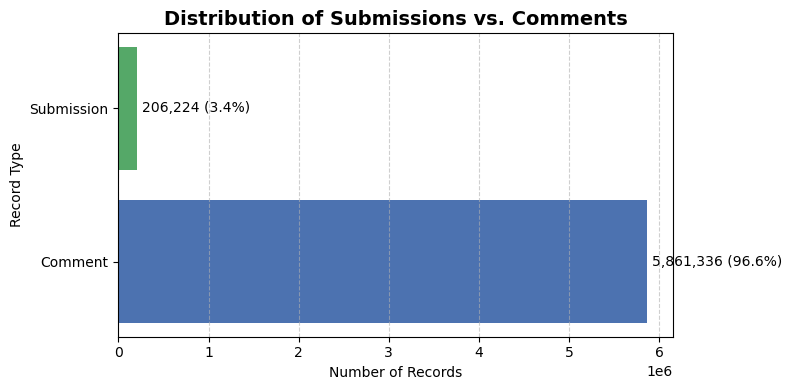

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(counts['Record Type'], counts['Count'], color=['#4C72B0', '#55A868'])

for bar, pct in zip(bars, counts['Percentage']):
    ax.text(bar.get_width() + total * 0.01, 
            bar.get_y() + bar.get_height()/2,
            f"{bar.get_width():,} ({pct}%)", 
            va='center', fontsize=10)

ax.set_title("Distribution of Submissions vs. Comments", fontsize=14, weight='bold')
ax.set_xlabel("Number of Records")
ax.set_ylabel("Record Type")
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#### **Q2** What is the timeframe covered by the dataset?
Clarifying the temporal boundaries allows the analysis to be contextualized within specific stages of the COVID-19 pandemic and to trace how discussions evolved alongside major social or political events in 2020.

#### **Q3** What basic information can be summarized about the dataset (columns, data types, missing values)?
A preliminary structural overview is necessary to assess data completeness and technical readiness for analysis, ensuring that variables like dates, authors, and subreddits are consistent and usable.

#### **Q4** Which specific conspiracy theories were most frequently discussed in 2020?
Identifying the dominant themes reveals which narratives gained prominence during the pandemic and highlights shifts in the collective focus of conspiracy communities.

### **Activity and Distribution**

#### **Q5** Which are the top 10 most active subreddits by number of posts/comments?
Mapping activity levels across subreddits makes it possible to pinpoint where conspiracy discussions were most intense and which communities played a central role in shaping discourse.

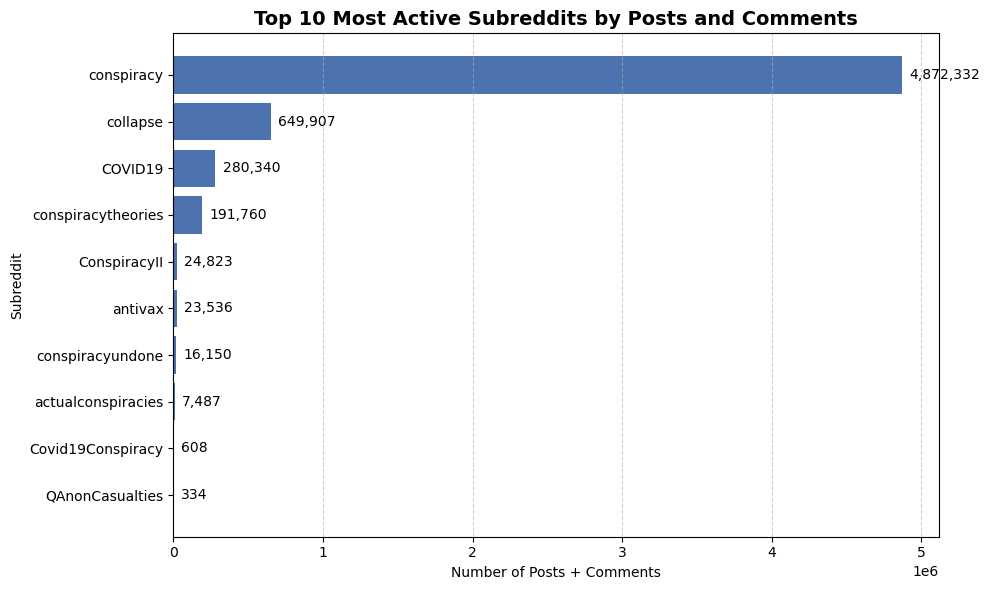

In [7]:
subreddit_counts = df['subreddit'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(subreddit_counts.index, subreddit_counts.values, color="#4C72B0")
ax.invert_yaxis() 

for i, v in enumerate(subreddit_counts.values):
    ax.text(v + max(subreddit_counts.values) * 0.01, i, f"{v:,}", va='center')

ax.set_title("Top 10 Most Active Subreddits by Posts and Comments", fontsize=14, weight='bold')
ax.set_xlabel("Number of Posts + Comments")
ax.set_ylabel("Subreddit")
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### **Q6** Are there significant peaks of activity around major real-world events?
Correlating posting spikes with external events sheds light on how online conspiracy discussions respond to triggers such as lockdown announcements, vaccine news, or political developments.

#### **Q7** How many unique authors are there, and how many contributions did each make? 
Examining author participation helps determine whether discourse was driven by a few prolific individuals or by a larger, more distributed group of users.

#### **Q8** Which subreddits have the highest average score versus the highest post volume?
This comparison exposes differences between popularity and engagement—some communities may generate large amounts of content, while others achieve greater approval or influence per post.

#### **Q9** Do different subreddits experience synchronized activity peaks?
Studying temporal synchronization between communities can indicate information diffusion and interconnection among different conspiracy networks.

#### **Q10** Do the most active authors post in many subreddits or focus on one community?
Analyzing user posting patterns helps identify whether certain participants act as cross-community links or remain confined to specific ideological spaces.

#### **Q11** How does the average score (karma/upvotes) change over time?
Tracking how post scores evolve provides insight into shifting community attitudes and levels of endorsement toward conspiracy-related content throughout the pandemic year.

### **Content Analysis**

#### **Q12** What is the overall sentiment distribution of all comments and submissions?
Sentiment analysis reveals the emotional atmosphere of conspiracy discussions, indicating whether fear, anger, or hope dominated online exchanges in 2020.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
df['sentiment_score'] = df['body'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiment
def categorize(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize)

df[['body', 'sentiment_score', 'sentiment_category']].head()

,body,sentiment_score,sentiment_category
29,"See, you're proving my point. Much of the baby...",-0.9625,Negative
50,For some reason I thought the Illuminati used ...,0.4265,Positive
70,"When you walk into any establishment, look to ...",0.0000,Neutral
96,"You need to do more research on satanic elite,...",0.9467,Positive
102,Anything belown 33 so ive heard. Once you reac...,-0.4404,Negative


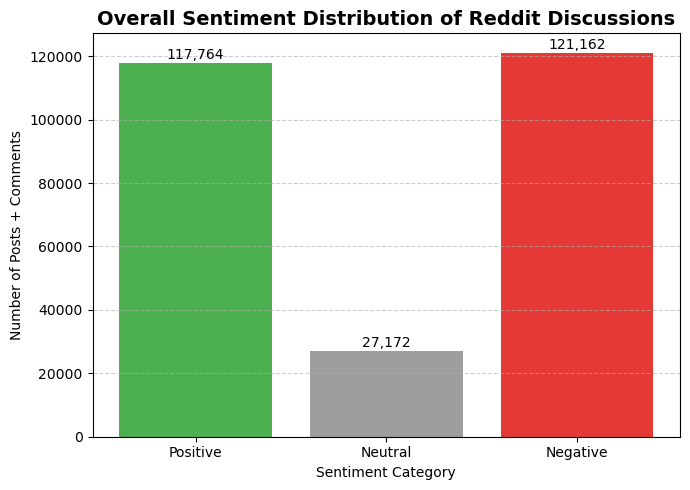

In [14]:
sentiment_counts = df['sentiment_category'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(sentiment_counts.index, sentiment_counts.values, color=['#4CAF50', '#9E9E9E', '#E53935'])

for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + max(sentiment_counts.values) * 0.01, f"{v:,}", ha='center')

ax.set_title("Overall Sentiment Distribution of Reddit Discussions", fontsize=14, weight='bold')
ax.set_xlabel("Sentiment Category")
ax.set_ylabel("Number of Posts + Comments")
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

The overall sentiment distribution of Reddit discussions about conspiracy narratives in 2020 shows a strong emotional polarization. 

Negative sentiment dominates the conversations, slightly surpassing positive sentiment, while neutral posts form a much smaller portion. This indicates that conspiracy-related discussions were highly emotionally charged, with fear, distrust, and anger being particularly widespread. 

The sizable share of positive sentiment suggests the presence of hopeful or supportive narratives within these communities as well, but the prevalence of negativity reflects heightened anxiety and conflict during this period of global uncertainty.

#### **Q13** What are the most positive and most negative subreddits overall?
Comparing sentiment across communities makes it possible to identify where discourse tended to be more constructive, aggressive, or despairing, illustrating emotional diversity within the conspiracy sphere.

#### **Q14** Are longer comments more emotionally expressive (stronger positive/negative values)? 
Exploring the relationship between comment length and emotional intensity can show whether detailed engagement corresponds to stronger affective expression.

#### **Q15** How does sentiment vary between submissions and comments? 
Contrasting the tone of original posts with that of replies helps determine whether discussions amplify, neutralize, or challenge the initial emotional framing.

#### **Q16** Do posts with more positive sentiment tend to get higher scores? 
Assessing this relationship clarifies which emotional tones receive greater validation from the community, shedding light on collective preferences for positivity or outrage.

### **Interesring Findings** 

#### **Q17** Can recurring narratives or metaphors be identified? 
Recognizing repeated metaphors and storylines allows us to understand how conspiracy narratives are constructed symbolically, often relying on themes of awakening, deception, or hidden power.

In [17]:
!pip install python-louvain

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9402 sha256=316af81dab04901ee8a94c7fc41a44ba7cc7459c394b5389c4429d348c5c952b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ee\52\54\7ecd0f1ebf5f5a8466f70a27ed2b94d20b955376879d6159c5
Successfully built python-louvain


  DEPRECATION: Building 'python-louvain' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'python-louvain'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [34]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import community.community_louvain as community_louvain

nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("english"))

# load only the needed columns, faster
df = pd.read_csv(r"C:\Users\User\Desktop\uni\CSS\project\dataset.csv", usecols=["body"])

# custom conspiracy vocabulary
conspiracy_terms = [
    "deep state","truth","wake up","they control","hidden","elite",
    "illuminati","nwo","new world order","great awakening",
    "plandemic","sheeple","mind control","5g","fake news",
    "qanon","cabal","puppet","big pharma","globalists",
]

# keep only rows containing conspiratorial themes
pattern = r"|".join([re.escape(x) for x in conspiracy_terms])
df = df[df["body"].str.contains(pattern, case=False, na=False)]

# cleaning function
def clean(t):
    t = str(t).lower()
    t = re.sub(r"http\S+|www\S+", " ", t)
    t = re.sub(r"[^a-z\s]", " ", t)
    words = [w for w in t.split() if w not in stop and len(w) > 2]
    return " ".join(words)

df["clean"] = df["body"].apply(clean)

# bigram extractor
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=15)
X = vectorizer.fit_transform(df["clean"])

counts = X.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()
bigram_freq = dict(zip(bigrams, counts))

# sort by conspiracy relevance (keep only phrases that contain keywords)
filtered_bigrams = {
    bg:freq for bg,freq in bigram_freq.items()
    if any(key in bg for key in ["state","truth","wake","control","elite","order","5g","qanon","virus","plandemic"])
}

top_bigrams = Counter(filtered_bigrams).most_common(25)

print("Top conspiracy bigrams:\n")
for phrase, freq in top_bigrams:
    print(f"{phrase:35s} {freq}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top conspiracy bigrams:

deep state                          18530
world order                         7878
mind control                        5320
united states                       5086
know truth                          2852
telling truth                       2821
tell truth                          1894
great awakening                     1533
find truth                          1521
corona virus                        1309
see truth                           1185
people wake                         1163
submission statement                1096
global elite                        1076
real truth                          970
truth truth                         959
controlled opposition               937
truth people                        903
speaking truth                      807
need wake                           738
speak truth                         723
want truth                          707
truth seekers                       706
ruling elite                        695


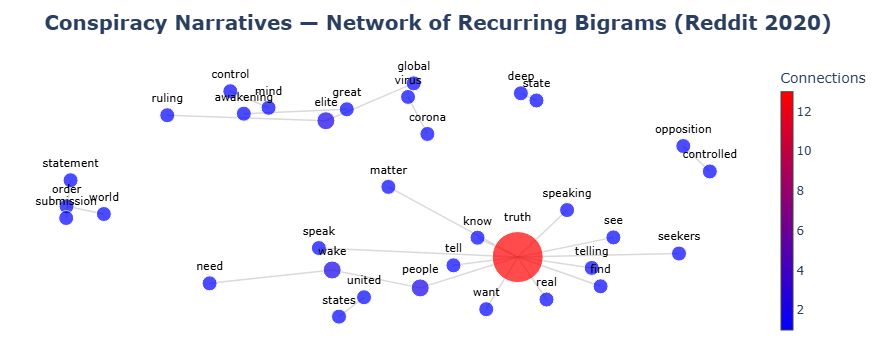

In [43]:
 import plotly.graph_objects as go
import networkx as nx

# --- build conspiracy graph from bigrams ---
G = nx.Graph()

for phrase, freq in top_bigrams:
    w1, w2 = phrase.split()
    G.add_edge(w1, w2, weight=freq)

# --- Layout ---
pos = nx.spring_layout(G, k=20, iterations=200, seed=42)

# --- Edges ---
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1.5, color='rgba(160,160,160,0.4)'),
    hoverinfo='none',
    mode='lines'
)

# --- Nodes ---
node_x, node_y = [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_adjacencies = []
node_text = []

for node, adjacencies in G.adjacency():
    deg = len(adjacencies)
    node_adjacencies.append(deg)
    node_text.append(f"{node}<br>Connections: {deg}")

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=[n for n in G.nodes()],
    textposition="top center",
    textfont=dict(size=11, color="black"),
    marker=dict(
        showscale=True,
        colorscale='Bluered',
        color=node_adjacencies,
        size=[12 + d * 3 for d in node_adjacencies],
        line=dict(width=1, color='white'),
        colorbar=dict(
            thickness=12,
            title='Connections',
            xanchor='left'
        )
    )
)

# --- Final figure ---
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title="<b>Conspiracy Narratives — Network of Recurring Bigrams (Reddit 2020)</b>",
        titlefont_size=20,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=20, r=20, t=60),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        plot_bgcolor="white"
    )
)

fig.update_traces(textposition="top center")  
fig.show()


Based on the 2020 Reddit data, the network graph shows that the concept of “truth” serves as the most central and highly connected hub within these conspiracy narratives.

It functions as a core anchor that links directly to ideas related to seeking, knowing, and revealing — such as “find,” “know,” “tell,” “see,” and “want.”

The visualization also highlights several distinct thematic clusters, including:
- Global Control: “great elite,” “mind control,” “global virus,” “deep state”
- New World Order: “order submission,” “world”
- Call to Action: “wake,” “united,” “people,” “speak”

Despite their differences, all these clusters are tied back to the central pursuit of truth, suggesting that it acts as the unifying concept across a wide range of conspiracy themes.

#### **Q18** Which grammatical constructions are most common (imperative, interrogative, emotional)? 
Analyzing sentence structure helps reveal rhetorical strategies—whether users try to command, question, or emotionally appeal to others—to foster belief or participation.

#### **Q19** Has skepticism toward official statistics and mainstream media increased during the pandemic?
Measuring changes in expressions of distrust provides evidence for whether COVID-19 intensified anti-establishment attitudes within conspiracy communities.

#### **Q20** Does the language of users who discuss COVID differ from that of those discussing other conspiracy topics?
Comparing linguistic patterns highlights how the pandemic introduced new vocabularies—medical, scientific, or apocalyptic—and reshaped discourse styles.

#### **Q21** Do topics with religious undertones have longer discussion threads?
Examining thread length in religiously themed posts helps gauge whether spiritual narratives inspire deeper or more sustained engagement.

#### **Q22** Which keywords most strongly co-occur with “COVID” or “virus”?
Identifying keyword co-occurrences uncovers how different ideas—such as “5G,” “vaccine,” “control,” or “Bill Gates”—clustered around the concept of the virus, revealing the structure of pandemic-related conspiracies.